In [26]:
from cProfile import label
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def f(x):
    return np.exp(np.sin(3 * x))

In [28]:
def lagrange_polynomial(x_list, i):

    li = [1]
    n = len(x_list)
    for j in range(n):
        if j != i:
            temp = [1 / (x_list[i]-x_list[j]), -x_list[j] / (x_list[i]-x_list[j])]
            li = np.polymul(li, temp)
    
    return li

In [29]:
def lagrange_method(x_list, y_list):

    n = len(x_list)
    res = [0]
    for i in range(n):
        li = lagrange_polynomial(x_list, i)
        li = [y_list[i]*x for x in li]
        res = np.polyadd(res, li)

    return res

In [30]:
x_list = [0.1000, 0.8225, 1.5450, 2.2675, 2.9900]
y_list = [1.3438, 1.8667, 0.3690, 1.6426, 1.5516]

x_test = [0, 1, 2, 3, 5]
y_test = [-3, 0, 5, 12, 32]

In [31]:
res = lagrange_method(x_list, y_list)
res

array([ -1.3651545 ,   8.58160175, -16.85668727,  10.54142614,
         0.44977917])

In [32]:
lagrange_str = ""
degree = len(res) - 1
for i in range (degree + 1):
    if abs(res[i]) > 1e-10:
        lagrange_str += str(res[i])
        if degree - i > 0:
            lagrange_str += "x^"
            lagrange_str += str(degree - i)
        lagrange_str += " + "
lagrange_str = lagrange_str[:-3]

print("Fitted Polynomial:", lagrange_str)

Fitted Polynomial: -1.3651545007421457x^4 + 8.581601750488195x^3 + -16.856687265845732x^2 + 10.54142614322494x^1 + 0.44977917203554957


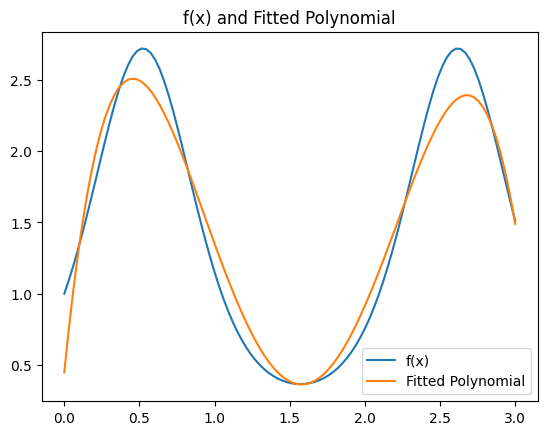

In [33]:
x = np.linspace(0, 3, 100)

plot1 = plt.figure(1)
plt.title('f(x) and Fitted Polynomial')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, np.polyval(res, x), label='Fitted Polynomial')
plt.legend()

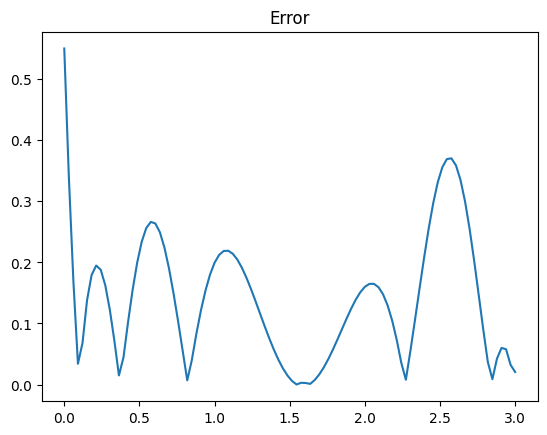

In [34]:
plot2 = plt.figure(2)
plt.title('Error')
plt.plot(x, abs(f(x) - np.polyval(res, x)))